In [1]:
from ipynb.fs.full.Models import *
download=False

# Plot residuals vs. time
1. F Residuals - mean squared
2. V-A Residuals - mean squared
3. F-Residuals - normalized
4. F-residual - Simple
5. F-residuals - qualitative graphs

In [3]:
models = []
for i,country in enumerate(countries):
    mods=[]
    for time in times:
        mod=Model(country, SIAR, time=time, start=starts[i],download=download)
        #mod=country+' '+time #just test line
        mods.append(mod)
    mods=dict(zip(times,mods))
    models.append(mods)
models=dict(zip(countries,models))

Creating SIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIAR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creating SIAR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creating SIAR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creatin

In [4]:
country='Italy'
i=c_index[country]

## 1. F Residuals - mean squared

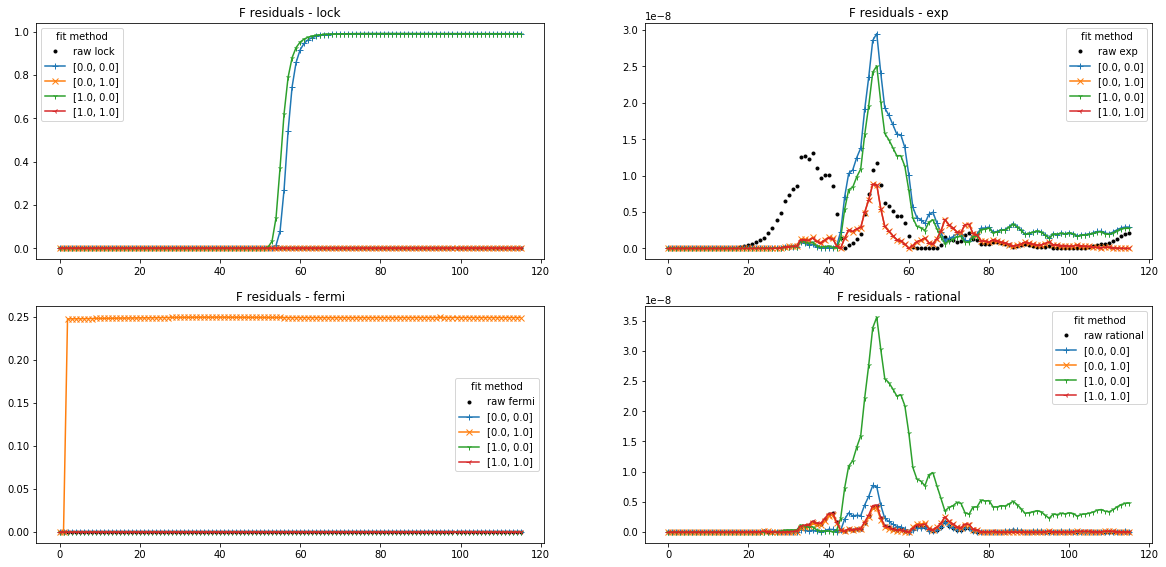

split without acc fit/with acc fit  for rational time


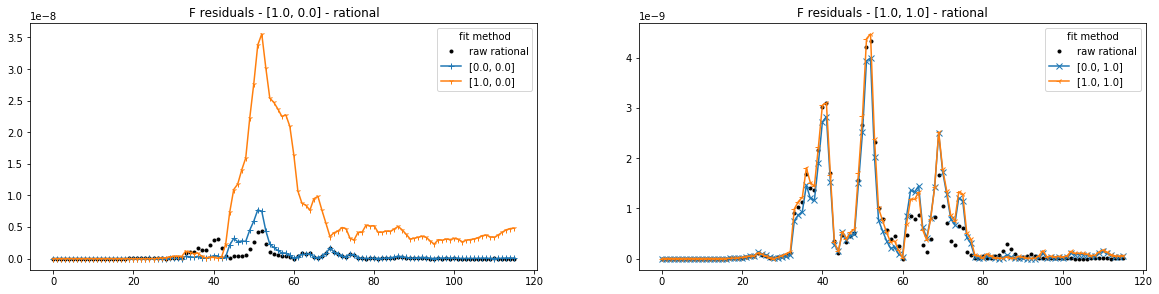

In [5]:
#F-residuals
markers = ['+','x','1','3','.']
figsize = plt.figure(figsize=(20,20))
for i,time in enumerate(times):
    plt.subplot(4,2,i+1)
    
    #raw fit
    mod=models[country][time]
    fname=time+'.csv'
    df = pd.read_csv('original_params/'+fname, index_col=0)
    opt_params=list(df.loc[country][:-2])
    #mean square residual
    y=(mod.predict(opt_params,out='F')-mod.data/mod.N)**2 #RESIDUALS
    x=range(len(y))
    plt.plot(x,y,'.',color='black',label='raw '+time)       
    
    for j,weight in enumerate(weights):
        a_w, r_w = weight
        #get opt params
        mod=models[country][time]
        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        #F residuals
        y=(mod.predict(opt_params,out='F')-mod.data/mod.N)**2 #RESIDUALS
        #plot
        x=range(len(y))
        plt.plot(x,y,marker=markers[j],label=weight)
        
    plt.legend(title='fit method')
    plt.title('F residuals - '+time)
plt.show()

#################################
print('split without acc fit/with acc fit  for rational time')
#################################

#redo F-plot for rational time dependence
time='rational'
fig = plt.figure(figsize=(20,10))

mod=models[country][time]
fname=time+'.csv'
df = pd.read_csv('original_params/'+fname, index_col=0)
opt_params=list(df.loc[country][:-2])
#mean square residual
y_raw=(mod.predict(opt_params,out='F')-mod.data/mod.N)**2 #RESIDUALS
x_raw=range(len(y_raw))

for i in (0,1):
    plt.subplot(2,2,1+i)
    plt.plot(x_raw,y_raw,'.',color='black',label='raw '+time)
    for k in (0,2):
        j=i+k
        weight=weights[j]
        a_w, r_w = weight

        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        #F residuals
        y=(mod.predict(opt_params,out='F')-mod.data/mod.N)**2 #RESIDUALS
        #plot
        x=range(len(y))
        plt.plot(x,y,marker=markers[j],label=weight)
    plt.title('F residuals - ' + str(weight) +' - '+time)
    plt.legend(title='fit method')
plt.show()

there are differences to the raw data fits!

## 2. V-A-Residuals - mean squared

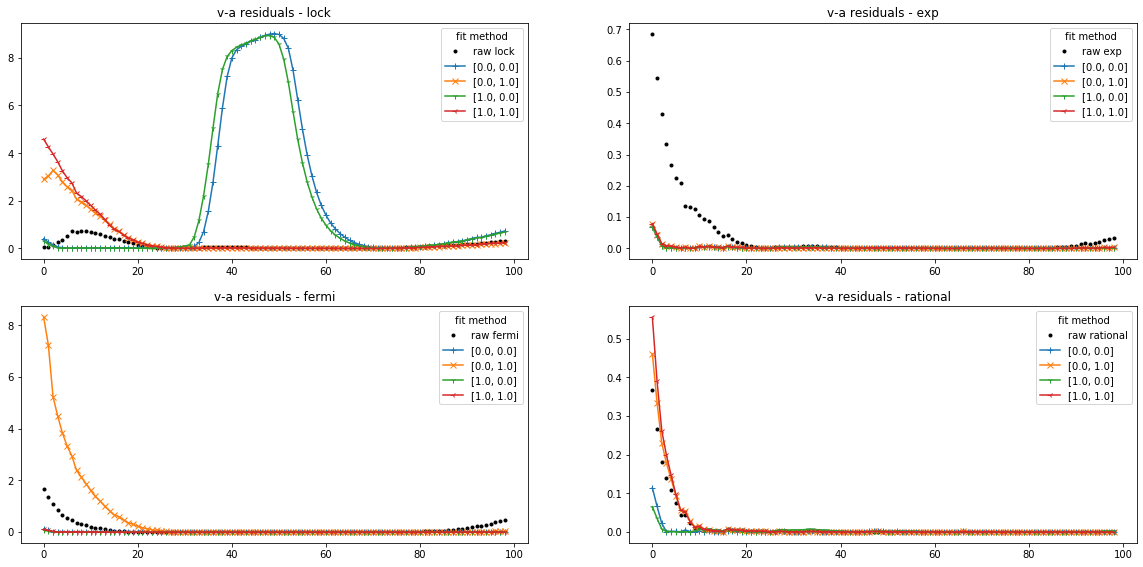

split without acc fit/with acc fit  for rational time


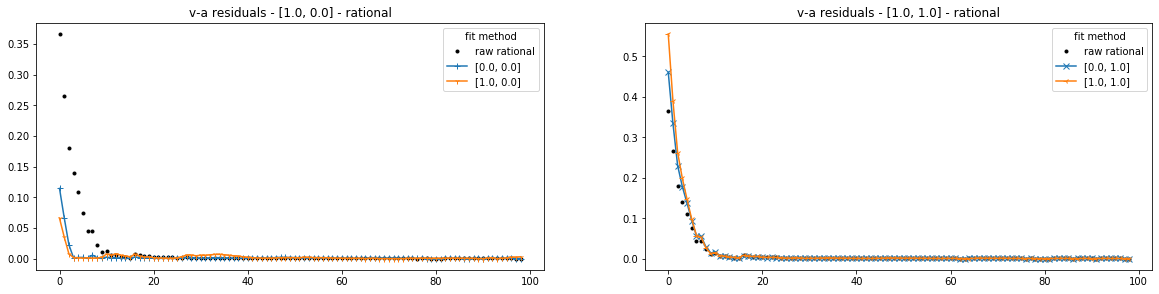

In [6]:
#v-a-residuals
markers = ['+','x','1','3','.']
figsize = plt.figure(figsize=(20,20))
for i,time in enumerate(times):
    plt.subplot(4,2,i+1)
    
    #raw fit
    mod=models[country][time]
    fname=time+'.csv'
    df = pd.read_csv('original_params/'+fname, index_col=0)
    opt_params=list(df.loc[country][:-2])
    #va mean square residual
    y=(mod.predict(opt_params)[0]-mod.v_data)**2+(mod.predict(opt_params)[1]-mod.a_data)**2 #RESIDUALS
    x=range(len(y))
    plt.plot(x,y,'.',color='black',label='raw '+time)       
    
    for j,weight in enumerate(weights):
        a_w, r_w = weight
        #get opt params
        mod=models[country][time]
        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        #F residuals
        y=(mod.predict(opt_params)[0]-mod.v_data)**2+(mod.predict(opt_params)[1]-mod.a_data)**2 #RESIDUALS
        #plot
        x=range(len(y))
        plt.plot(x,y,marker=markers[j],label=weight)
        
    plt.legend(title='fit method')
    plt.title('v-a residuals - '+time)
plt.show()
#################################
print('split without acc fit/with acc fit  for rational time')
#################################
#redo F-plot for rational time dependence
time='rational'
fig = plt.figure(figsize=(20,10))

mod=models[country][time]
fname=time+'.csv'
df = pd.read_csv('original_params/'+fname, index_col=0)
opt_params=list(df.loc[country][:-2])
#mean square residual
y_raw=(mod.predict(opt_params)[0]-mod.v_data)**2+(mod.predict(opt_params)[1]-mod.a_data)**2 #RESIDUALS
x_raw=range(len(y_raw))

for i in (0,1):
    plt.subplot(2,2,1+i)
    plt.plot(x_raw,y_raw,'.',color='black',label='raw '+time)
    for k in (0,2):
        j=i+k
        weight=weights[j]
        a_w, r_w = weight

        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        #F residuals
        y=(mod.predict(opt_params)[0]-mod.v_data)**2+(mod.predict(opt_params)[1]-mod.a_data)**2 #RESIDUALS
        #plot
        x=range(len(y))
        plt.plot(x,y,marker=markers[j],label=weight)
    plt.title('v-a residuals - ' + str(weight)+' - '+time)
    plt.legend(title='fit method')
plt.show()

## 3. F Residuals - Normalized
Each data point is divided by the measured F-value at that time instant

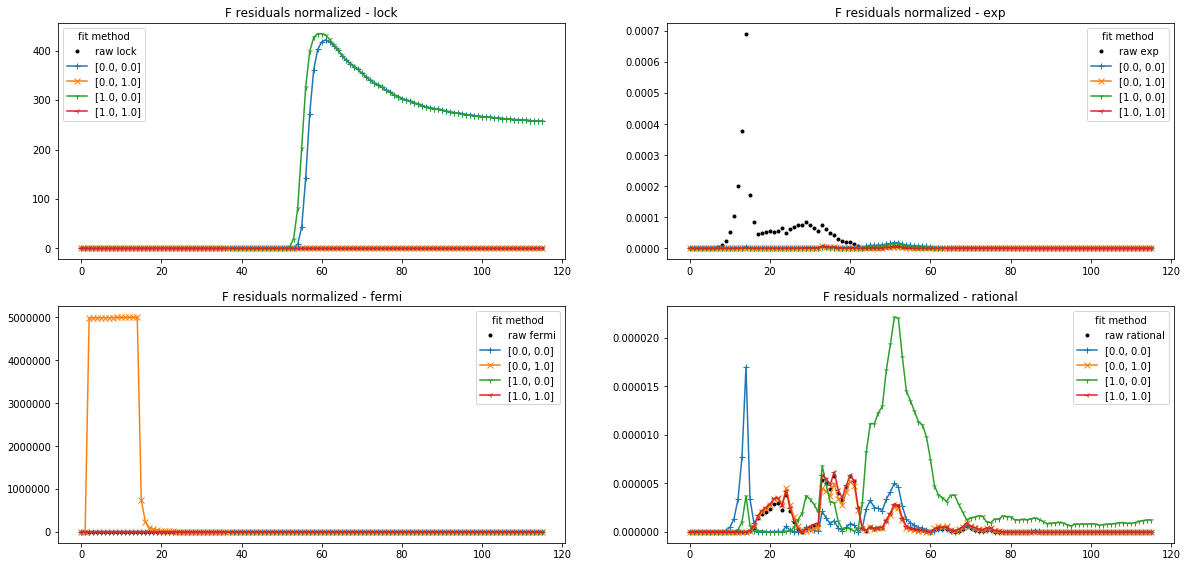

split without acc fit/with acc fit  for rational time


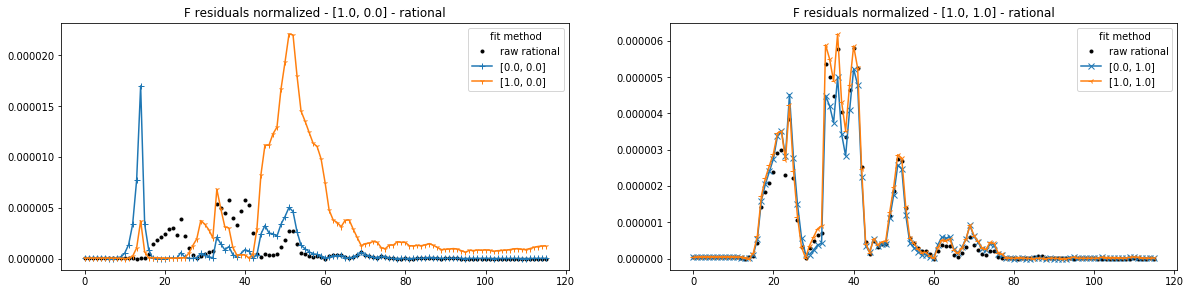

In [7]:
#F-residuals
markers = ['+','x','1','3','.']
figsize = plt.figure(figsize=(20,20))
for i,time in enumerate(times):
    plt.subplot(4,2,i+1)
    
    #raw fit
    mod=models[country][time]
    fname=time+'.csv'
    df = pd.read_csv('original_params/'+fname, index_col=0)
    opt_params=list(df.loc[country][:-2])
    #mean square residual
    y=((mod.predict(opt_params,out='F')-mod.data/mod.N)**2)/(mod.data/mod.N) #RESIDUALS NORMALIZED
    x=range(len(y))
    plt.plot(x,y,'.',color='black',label='raw '+time)       
    
    for j,weight in enumerate(weights):
        a_w, r_w = weight
        #get opt params
        mod=models[country][time]
        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        #F residuals
        y=((mod.predict(opt_params,out='F')-mod.data/mod.N)**2)/(mod.data/mod.N) #RESIDUALS NORMALIZED
        #plot
        x=range(len(y))
        plt.plot(x,y,marker=markers[j],label=weight)
        
    plt.legend(title='fit method')
    plt.title('F residuals normalized - '+time)
plt.show()

#################################
print('split without acc fit/with acc fit  for rational time')
#################################

#redo F-plot for rational time dependence
time='rational'
fig = plt.figure(figsize=(20,10))

mod=models[country][time]
fname=time+'.csv'
df = pd.read_csv('original_params/'+fname, index_col=0)
opt_params=list(df.loc[country][:-2])
#mean square residual
y_raw=((mod.predict(opt_params,out='F')-mod.data/mod.N)**2)/(mod.data/mod.N) #RESIDUALS NORMALIZED
x_raw=range(len(y_raw))

for i in (0,1):
    plt.subplot(2,2,1+i)
    plt.plot(x_raw,y_raw,'.',color='black',label='raw '+time)
    for k in (0,2):
        j=i+k
        weight=weights[j]
        a_w, r_w = weight

        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        #F residuals
        y=((mod.predict(opt_params,out='F')-mod.data/mod.N)**2)/(mod.data/mod.N) #RESIDUALS NORMALIZED
        #plot
        x=range(len(y))
        plt.plot(x,y,marker=markers[j],label=weight)
    plt.title('F residuals normalized - ' + str(weight) +' - '+time)
    plt.legend(title='fit method')
plt.show()

## 4. Simple F Residuals

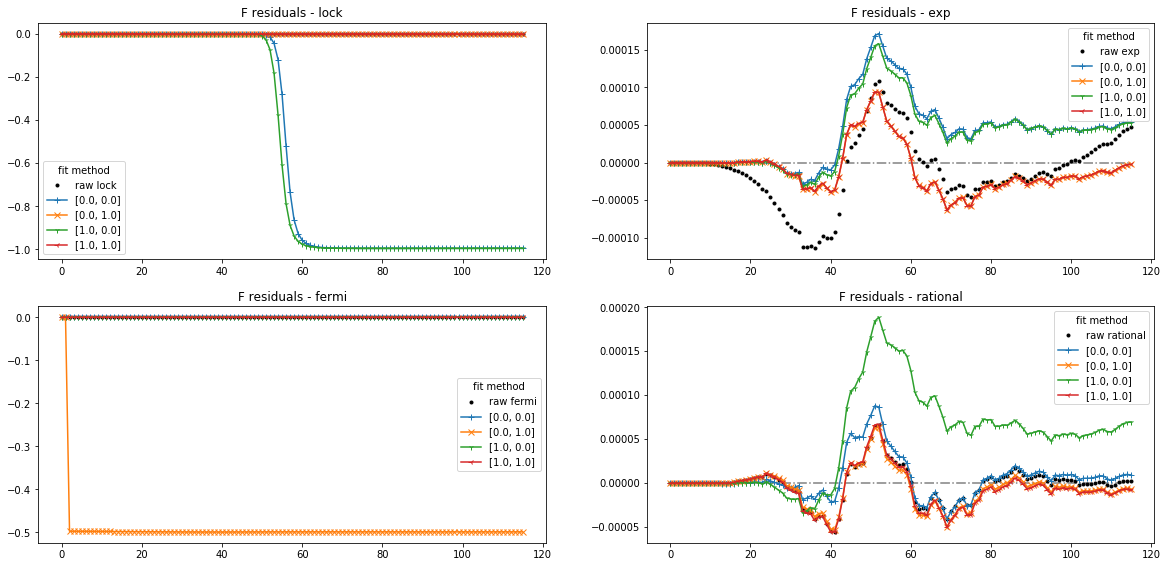

split without acc fit/with acc fit  for rational time


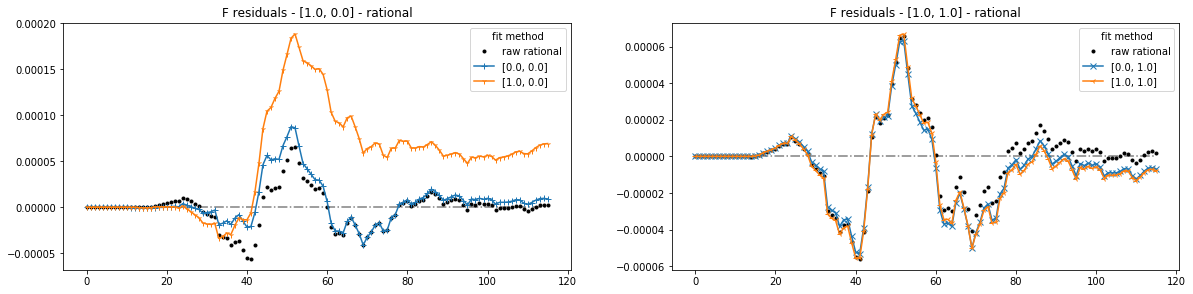

In [8]:
#F-residuals
markers = ['+','x','1','3','.']
figsize = plt.figure(figsize=(20,20))
for i,time in enumerate(times):
    plt.subplot(4,2,i+1)
    
    #raw fit
    mod=models[country][time]
    fname=time+'.csv'
    df = pd.read_csv('original_params/'+fname, index_col=0)
    opt_params=list(df.loc[country][:-2])
    #mean square residual
    y=(mod.data/mod.N-mod.predict(opt_params,out='F')) #RESIDUALS
    x=range(len(y))
    plt.plot(x,y,'.',color='black',label='raw '+time)       
    
    for j,weight in enumerate(weights):
        a_w, r_w = weight
        #get opt params
        mod=models[country][time]
        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        #F residuals
        y=(mod.data/mod.N-mod.predict(opt_params,out='F')) #RESIDUALS
        #plot
        x=range(len(y))
        plt.plot(x,y,marker=markers[j],label=weight)
        
    plt.legend(title='fit method')
    plt.title('F residuals - '+time)
    plt.hlines(y=0,xmin=min(x),xmax=max(x),linestyles='-.',colors='grey')
plt.show()

#################################
print('split without acc fit/with acc fit  for rational time')
#################################

#redo F-plot for rational time dependence
time='rational'
fig = plt.figure(figsize=(20,10))

mod=models[country][time]
fname=time+'.csv'
df = pd.read_csv('original_params/'+fname, index_col=0)
opt_params=list(df.loc[country][:-2])
#mean square residual
y_raw=(mod.data/mod.N-mod.predict(opt_params,out='F')) #RESIDUALS
x_raw=range(len(y_raw))

for i in (0,1):
    plt.subplot(2,2,1+i)
    plt.plot(x_raw,y_raw,'.',color='black',label='raw '+time)
    for k in (0,2):
        j=i+k
        weight=weights[j]
        a_w, r_w = weight

        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        #F residuals
        y=(mod.data/mod.N-mod.predict(opt_params,out='F')) #RESIDUALS
        #plot
        x=range(len(y))
        plt.plot(x,y,marker=markers[j],label=weight)
    plt.title('F residuals - ' + str(weight) +' - '+time)
    plt.legend(title='fit method')
    plt.hlines(y=0,xmin=min(x),xmax=max(x),linestyles='-.',colors='grey')
plt.show()

#### Orientation in v-a plot (identification of data points)

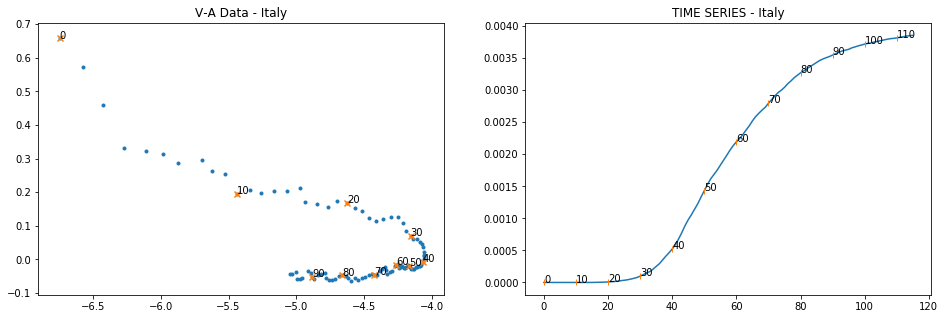

In [9]:
#va-data and time series with orientation points
mod=models[country]['exp']
plt.figure(figsize=(16,5))
#v-a-plot
plt.subplot(1,2,1)
v=mod.v_data
a=mod.a_data
t=range(len(v))
v_marks=[v[i] for i in t if i%10==0]
a_marks=[a[i] for i in t if i%10==0]
t_marks=[i for i in range(len(v)) if i%10==0]
#plot
plt.scatter(v,a,marker='.')
plt.scatter(v_marks, a_marks, marker='x')
for i in t_marks:
    plt.text(v[i],a[i],str(i))
plt.title('V-A Data - ' + country)

#time series
plt.subplot(1,2,2)
y=mod.data/mod.N
x=range(len(mod.data))
y_marks=[y[i] for i in x if i%10==0]
x_marks=[x[i] for i in x if i%10==0]
y_marks, x_marks
plt.plot(x,y)
plt.plot(x_marks,y_marks,'|')
for i in x_marks:
    plt.text(i,y[i],str(i))
plt.title('TIME SERIES - ' + country)
plt.show()

## 5. qualitative graphs:
F-deviations rescaled by the maximum deviation in absolute of each curve

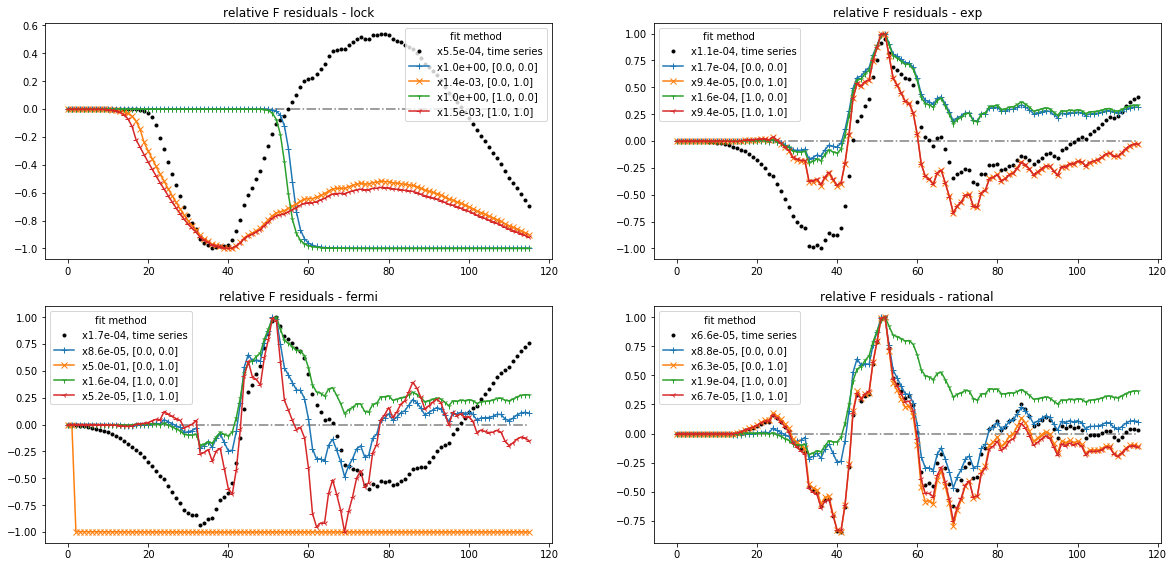

LEGEND: x represents the factor leading to the absolute deviations


In [10]:
#F-residuals
markers = ['+','x','1','3','.']
figsize = plt.figure(figsize=(20,20))
for i,time in enumerate(times):
    plt.subplot(4,2,i+1)
    
    #raw fit
    mod=models[country][time]
    fname=time+'.csv'
    df = pd.read_csv('original_params/'+fname, index_col=0)
    opt_params=list(df.loc[country][:-2])
    #mean square residual
    y=(mod.data/mod.N-mod.predict(opt_params,out='F')) #RESIDUALS
    maxdev = np.abs(y).max()
    y=y/maxdev #rescale
    x=range(len(y))
    plt.plot(x,y,'.',color='black',label='x%.1e, time series'%(maxdev))
    
    for j,weight in enumerate(weights):
        a_w, r_w = weight
        #get opt params
        mod=models[country][time]
        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        #F residuals
        y=(mod.data/mod.N-mod.predict(opt_params,out='F')) #RESIDUALS
        maxdev = np.abs(y).max()
        y=y/maxdev #rescale
        #plot
        x=range(len(y))
        plt.plot(x,y,marker=markers[j],label= 'x%.1e, '%(maxdev) + str(weight))
        
    plt.legend(title='fit method')
    plt.title('relative F residuals - '+time)
    plt.hlines(y=0,xmin=min(x),xmax=max(x),linestyles='-.',colors='grey')
plt.show()
print('LEGEND: x represents the factor leading to the absolute deviations')